#### matplotlib 출력

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

#### 한글 출력

In [3]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

def input_korean(img_dst, input_text, pt, color, fontsize=20):
    my_font = ImageFont.truetype("font/gulim.ttc", fontsize)
    img_dst = Image.fromarray(img_dst)
    mydraw = ImageDraw.Draw(img_dst)
    mydraw.text((pt[0], pt[1]), input_text, font=my_font, fill=(color[0], color[1], color[2]))
    return np.array(img_dst)

### 기본 이미지 출력

In [4]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

cv2.imshow("src",img_src)

cv2.waitKey()
cv2.destroyAllWindows()

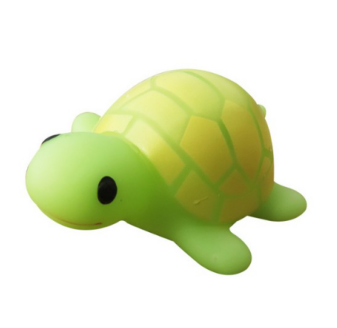

In [5]:
show_matplotlib_image(img_src)

### 이미지 크기 조절
##### 이미지 크기 절반으로 줄임 : pyrDown
- img_dst = cv2.pyrDown(img_src)
<br><br>
##### 이미지 크기 키우기 : pyrUp
- img_dst = cv2.pyrUp(img_src, dstsize=(width * 2, height * 2), borderType=cv2.BORDER_DEFAULT)
##### 이미지 크기를 임의로 조절 : resize
- 크기를 지정: img_dst = cv2.resize(img_src, dsize=(640, 480), interpolation=cv2.INTER_AREA)
- 가로세로 비율을 지정 : img_dst = cv2.resize(img_src, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR)

In [15]:
# 이미지 줄이기
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
img_dst = cv2.pyrDown(img_src)
cv2.imshow("dst",img_dst)

cv2.waitKey()
cv2.destroyAllWindows()

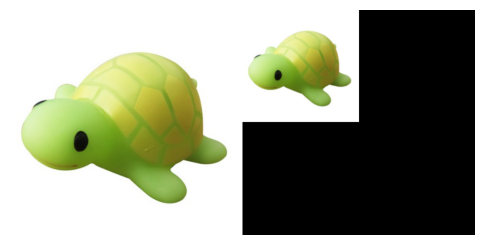

In [16]:
import numpy as np
import cv2
img_zero = np.zeros_like(img_src, dtype=np.uint8)
h1, w1 = img_dst.shape[:2]
img_zero[:h1,:w1,:] = img_dst
img_result = cv2.hconcat([img_src,img_zero])
show_matplotlib_image(img_result, 6,3)

In [25]:
# 이미지 키우기 : pyrDown
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
# dstsize는 2값만 사용 가능
img_dst = cv2.pyrUp(img_src, dstsize=(width * 2, height * 2), borderType=cv2.BORDER_DEFAULT)
cv2.imshow("dst",img_dst)

cv2.waitKey()
cv2.destroyAllWindows()

- resize사용

In [32]:
# 이미지 크기 변경
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

img_dst1 = cv2.resize(img_src, dsize=(int(width*2), int(height*2)), interpolation=cv2.INTER_AREA)
img_dst2 = cv2.resize(img_src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
cv2.imshow("dst1",img_dst1)
cv2.imshow("dst2",img_dst2)

cv2.waitKey()
cv2.destroyAllWindows()

### 역상 (Reverse Image)
- 255값에서 원래의 픽셀값을 뺀 값
- gray ( 255 - gray)
- color ( 255,255,255) - (b,g,r)
<br><br>
img_dst = cv2.bitwise_not(img_src)

In [36]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
img_gray_rev = cv2.bitwise_not(img_gray)
img_src_rev = cv2.bitwise_not(img_src)

cv2.imshow("src",img_src)
cv2.imshow("reverse - gray",img_gray_rev)
cv2.imshow("reverse - color",img_src_rev)

cv2.waitKey()
cv2.destroyAllWindows()

-예)
- 초록색 : (b,g,r) -> (0,255,0) -> reverse -> (255,0,255) -> magenta
- 노란색 : (b,g,r) -> (0,255,255) -> reverse -> (255,0,0) -> blue

### 흐림(Blur)
- 결과영상 = cv2.blur(원본영상, ksize, anchor, borderType)
  : 커널 크기(ksize), 고정점(anchor), 외삽법(borderType)
 - 커널크기 : 홀수 , anchor는 (-1,-1)이면 커널의 중심을 기준으로 함
- img_dst = cv2.blur(img_src, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

In [44]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

img_dst3 = cv2.blur(img_src, (3,3), anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT)
img_dst5 = cv2.blur(img_src, (5,5), anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT)
img_dst9 = cv2.blur(img_src, (9,9), anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT)

cv2.imshow("src",img_src)
cv2.imshow("img_dst3",img_dst3)
cv2.imshow("img_dst5",img_dst5)
cv2.imshow("img_dst9",img_dst9)


cv2.waitKey()
cv2.destroyAllWindows()

### 이진화
- 이진화를 적용하려면 이미지를 gray로 변환
- ret, img_bin = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
<br><br>
- img_bin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 467, 37)

In [55]:
import cv2
import numpy as np

img_src = cv2.imread('images/tree.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
img_gray = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)
_, img_otsu = cv2.threshold(img_gray, 100, 255, cv2.THRESH_OTSU) 
_, img_bin = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY) 
cv2.imshow("otsu",img_otsu)
cv2.imshow("bin",img_bin)

img_adp = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 467, 37)
cv2.imshow("adaptive",img_adp)
cv2.waitKey()
cv2.destroyAllWindows()

### 가장자리 검출

In [7]:
import cv2
import numpy as np

img_src = cv2.imread('images/rice.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

img_src = cv2.GaussianBlur(img_src, (3, 3), 0)
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
########## sobel #################################
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(img_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(img_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow("sobel", grad)

########### Laplacian ###########################
kernel_size = 3
img_dst = cv2.Laplacian(img_gray, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(img_dst)
cv2.imshow("laplacian", abs_dst)

########### Canny ###################################
# 아래쪽의 Trackbar 활용
canny = cv2.Canny(img_src, 100, 255)
cv2.imshow("canny", canny)


cv2.waitKey()
cv2.destroyAllWindows()

- Canny Edge 

In [8]:
import cv2 as cv

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Thr:'
ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv.blur(src_gray, (3,3))
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv.imshow(window_name, dst)

src = cv2.imread('images/rice.png', cv2.IMREAD_COLOR)
if src is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
    
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow(window_name)
cv.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv.waitKey()

32

### 이미지 채널 분리 및 병합

In [4]:
import cv2
import numpy as np

img_src = cv2.imread('images/tomato.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

### 채널 분리
img_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV)
img_h,img_s,img_v = cv2.split(img_hsv)

# 채널 병합
img_m_hsv = cv2.merge((img_h, img_s, img_v))
img_dst = cv2.cvtColor(img_m_hsv,cv2.COLOR_HSV2BGR)
cv2.imshow("src",img_dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 색상 추출 

In [5]:
import cv2
import numpy as np

img_src = cv2.imread('images/tomato.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

img_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV)
img_h,img_s,img_v = cv2.split(img_hsv)
img_h = cv2.inRange(img_h, 8, 22)

############## ORANGE ~ ANOTHER COLOR ########################
h_low=8; h_high=22
s_low=130; s_high=255
v_low=120; v_high=255
mask_orange = cv2.inRange(img_hsv, (h_low, s_low, v_low), (h_high, s_high, v_high))
img_hsv_orange = cv2.bitwise_and(img_hsv, img_hsv, mask=mask_orange)
img_bgr_orange = cv2.cvtColor(img_hsv_orange,cv2.COLOR_HSV2BGR)
###############################################################
cv2.imshow("src",img_bgr_orange)
# img_m_hsv = cv2.merge((img_h, img_s, img_v))
# img_dst = cv2.cvtColor(img_m_hsv,cv2.COLOR_HSV2BGR)
# cv2.imshow("src",img_dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

img_src = cv2.imread('images/tomato.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

img_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV)
img_h,img_s,img_v = cv2.split(img_hsv)
img_h = cv2.inRange(img_h, 8, 22)

############## RED ########################################
h1_low=0; h1_high=5
h2_low=175; h2_high=180
s_low=100; s_high=255
v_low=100; v_high=255
mask_1 = cv2.inRange(img_hsv, (h1_low, s_low, v_low), (h1_high, s_high, v_high))
mask_2 = cv2.inRange(img_hsv, (h2_low, s_low, v_low), (h2_high, s_high, v_high))

mask_red = cv2.addWeighted(mask_1, 1.0, mask_2, 1.0, 0.0)

img_hsv_red = cv2.bitwise_and(img_hsv, img_hsv, mask=mask_red)
img_bgr_red = cv2.cvtColor(img_hsv_red,cv2.COLOR_HSV2BGR)
###############################################################
cv2.imshow("dst",img_bgr_red)


cv2.waitKey()
cv2.destroyAllWindows()

### 얼굴 추출

In [7]:
import cv2
import numpy as np

img_src = cv2.imread('images/me.jpg', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
img_src = cv2.GaussianBlur(img_src, (5, 5), 0)
img_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV)
img_h,img_s,img_v = cv2.split(img_hsv)
img_h = cv2.inRange(img_h, 8, 22)

############## RED ########################################
h_low=8; h_high=16
s_low=50; s_high=255
v_low=50; v_high=255
mask = cv2.inRange(img_hsv, (h_low, s_low, v_low), (h_high, s_high, v_high))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

binary = cv2.bitwise_not(mask)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    if(10000 < cv2.contourArea(contours[i]) < 100000) :
        cv2.drawContours(img_src, [contours[i]], 0, (0, 255, 0), 2)
        # cv2.putText(img_src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        # print(i, hierarchy[0][i])
        cv2.putText(img_src, str(cv2.contourArea(contours[i])), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        cv2.imshow("src", img_src)
        cv2.waitKey(0)

#
# img_hsv_dst = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
# img_bgr_dst = cv2.cvtColor(img_hsv_dst,cv2.COLOR_HSV2BGR)
###############################################################
# cv2.imshow("dst",img_bgr_dst)


cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'